In [1]:
# --- Ridge Regression Boilerplate Code ---


# !pip install numpy pandas scikit-learn matplotlib seaborn

import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# --- 1. Generate synthetic data ---
np.random.seed(42)
n, p = 100, 5
X = np.random.randn(n, p)
true_beta = np.array([1.5, -2.0, 0.5, 0, 0])

# Add Gaussian noise
y = X.dot(true_beta) + np.random.randn(n)

# Optional: introduce multicollinearity
X[:, 1] = X[:, 0] * 0.8 + np.random.randn(n) * 0.2  # make feature 2 correlated with feature 1


In [3]:


# --- 2. Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:

# --- 3. Fit Ridge regression ---
ridge = Ridge(alpha=1.0)  # alpha = regularization strength
ridge.fit(X_train, y_train)

Ridge()

In [5]:

# --- 4. Predictions ---
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

In [6]:

# --- 5. Evaluation ---
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("Train RMSE:", rmse_train, "MAE:", mae_train)
print("Test RMSE:", rmse_test, "MAE:", mae_test)
print("Estimated coefficients:", ridge.coef_)
print("Intercept:", ridge.intercept_)

Train RMSE: 2.0359421847575585 MAE: 1.5944173262451067
Test RMSE: 1.862013245624017 MAE: 1.4122460717978484
Estimated coefficients: [ 1.04803331  1.01014603  0.24487502 -0.02859265  0.01035787]
Intercept: -0.17075230130646163


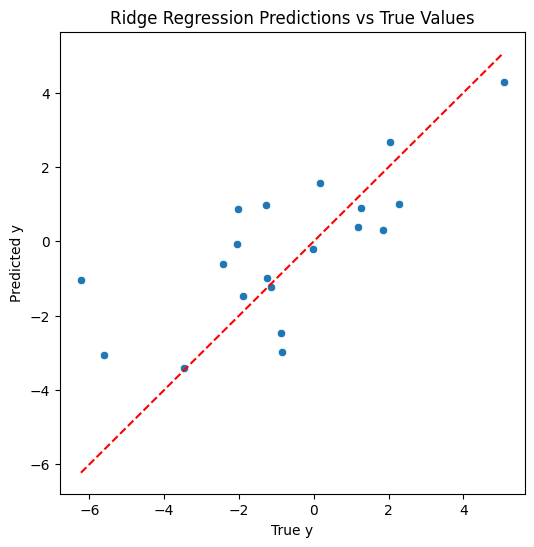

In [7]:

# --- 6. Visualization ---
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_test)
plt.xlabel("True y")
plt.ylabel("Predicted y")
plt.title("Ridge Regression Predictions vs True Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()
